# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import json
import time
from pprint import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
weather_api_key

'c51718a8fe1f408977826bbb65188383'

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [5]:
#containers for data
city_names = []
countries = []
latitudes = []
longitudes = []
temperatures = []
humidities = []
cloudy_skies = []
windiness = []

In [6]:
for city in cities:
    try:
        #get the data into json format
        response = requests.get(query_url + city).json()
        
        #store data into lists
        city_names.append(response['name'])
        latitudes.append(response['coord']['lat'])
        longitudes.append(response['coord']['lon'])
        cloudy_skies.append(response["clouds"]["all"])
        windiness.append(response["wind"]["speed"])
        temperatures.append(response["main"]["temp_max"])
        humidities.append(response["main"]["humidity"])
        countries.append(response['sys']['country'])
        print(f"{city}'s' information is processed")
        print("-" * 30)
    except:
        continue
        #cities not listed in the output were not found in the API
       

nikolskoye's' information is processed
------------------------------
riyadh's' information is processed
------------------------------
fort nelson's' information is processed
------------------------------
cherskiy's' information is processed
------------------------------
rocha's' information is processed
------------------------------
dikson's' information is processed
------------------------------
albany's' information is processed
------------------------------
fairbanks's' information is processed
------------------------------
ahuimanu's' information is processed
------------------------------
mataura's' information is processed
------------------------------
portland's' information is processed
------------------------------
punta arenas's' information is processed
------------------------------
sitka's' information is processed
------------------------------
ossora's' information is processed
------------------------------
upernavik's' information is processed
---------------

qaanaaq's' information is processed
------------------------------
dicabisagan's' information is processed
------------------------------
havoysund's' information is processed
------------------------------
freeport's' information is processed
------------------------------
elko's' information is processed
------------------------------
caravelas's' information is processed
------------------------------
klyuchi's' information is processed
------------------------------
vysokogornyy's' information is processed
------------------------------
luganville's' information is processed
------------------------------
constantine's' information is processed
------------------------------
jalu's' information is processed
------------------------------
rawson's' information is processed
------------------------------
saint-augustin's' information is processed
------------------------------
palestine's' information is processed
------------------------------
jhabua's' information is processed
----

leningradskiy's' information is processed
------------------------------
mar del plata's' information is processed
------------------------------
malanville's' information is processed
------------------------------
nanortalik's' information is processed
------------------------------
pangody's' information is processed
------------------------------
lasa's' information is processed
------------------------------
geraldton's' information is processed
------------------------------
langsa's' information is processed
------------------------------
pokhvistnevo's' information is processed
------------------------------
makinsk's' information is processed
------------------------------
port shepstone's' information is processed
------------------------------
bardiyah's' information is processed
------------------------------
kaseda's' information is processed
------------------------------
berlevag's' information is processed
------------------------------
baloda's' information is processe

vila franca do campo's' information is processed
------------------------------
alice springs's' information is processed
------------------------------
progreso's' information is processed
------------------------------
whakatane's' information is processed
------------------------------
ahipara's' information is processed
------------------------------
fuzhou's' information is processed
------------------------------
chama's' information is processed
------------------------------
sabya's' information is processed
------------------------------
yeppoon's' information is processed
------------------------------
kumta's' information is processed
------------------------------
sao filipe's' information is processed
------------------------------
awjilah's' information is processed
------------------------------
salalah's' information is processed
------------------------------
soyo's' information is processed
------------------------------
pallasovka's' information is processed
--------

traralgon's' information is processed
------------------------------
solhan's' information is processed
------------------------------
grande prairie's' information is processed
------------------------------
solnechnyy's' information is processed
------------------------------
marsa matruh's' information is processed
------------------------------
mezen's' information is processed
------------------------------
katsuura's' information is processed
------------------------------
itaituba's' information is processed
------------------------------
rugeley's' information is processed
------------------------------
urdoma's' information is processed
------------------------------
alnavar's' information is processed
------------------------------
camopi's' information is processed
------------------------------
champerico's' information is processed
------------------------------
chaadayevka's' information is processed
------------------------------
parintins's' information is processed
---

# Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_df = pd.DataFrame({
    "City": city_names,
    "Country": countries,
    "Latitude":latitudes,
    "Longitude": longitudes,
    "Temperatures": temperatures,
    "Humidity": humidities,
    "Cloudiness": cloudy_skies,
    "Windiness" : windiness
})
weather_df.head()

,City,Country,Latitude,Longitude,Temperatures,Humidity,Cloudiness,Windiness
0,Nikolskoye,RU,59.7035,30.7861,5.00,85,90,4.47
1,Riyadh,SA,24.6877,46.7219,53.60,71,0,3.44
2,Fort Nelson,CA,58.8053,-122.7002,-16.60,63,75,10.36
3,Cherskiy,RU,68.7500,161.3000,7.25,77,94,5.77
4,Rocha,UY,-34.4833,-54.3333,64.99,90,95,10.67


In [8]:
weather_df.to_csv("./Data/weather_info.csv")

In [9]:
weather_df.count()

City            554
Country         554
Latitude        554
Longitude       554
Temperatures    554
Humidity        554
Cloudiness      554
Windiness       554
dtype: int64

In [10]:
weather_df.value_counts()

City                Country  Latitude  Longitude  Temperatures  Humidity  Cloudiness  Windiness
‘Āhuimanu           US        21.4447  -157.8378   80.60        41        1           16.11        1
Inta                RU        66.0317   60.1659   -19.30        88        100         3.38         1
Itaituba            BR       -4.2761   -55.9836    82.40        78        40          5.75         1
Ishigaki            JP        24.3448   124.1572   66.20        63        75          19.57        1
Isangel             VU       -19.5500   169.2667   86.00        66        20          6.67         1
                                                                                                  ..
Portland            US        45.5234  -122.6762   46.40        46        90          1.63         1
Porto Nacional      BR       -10.7081  -48.4172    80.60        78        75          5.75         1
Portobelo           PA        9.5500   -79.6500    80.01        72        94          3.00      

Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#  Get the indices of cities that have humidity over 100%.
weather_df[weather_df["Humidity"] > 100]

,City,Country,Latitude,Longitude,Temperatures,Humidity,Cloudiness,Windiness


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
print(f"There are no cities with humidities > 100%")

There are no cities with humidities > 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

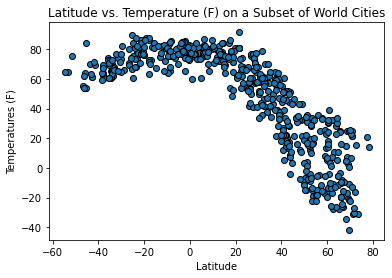

In [13]:
plt.scatter(weather_df.Latitude, weather_df.Temperatures, edgecolors="black")
plt.title("Latitude vs. Temperature (F) on a Subset of World Cities")
plt.xlabel("Latitude")
plt.ylabel("Temperatures (F)")
plt.savefig("./Images/lat_temp.png",bbox_inches="tight")
plt.show()
plt.close()

In [14]:
##Latitude vs Temperature plot
correlation_matrix = np.corrcoef(weather_df.Latitude, weather_df.Temperatures)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared = round(r_squared,2)
print(f"The latitude vs. temperature plot is a curvlinear (inverted U) relationship with a r^2 value of {r_squared}, which exhibits a moderate correlation")

The latitude vs. temperature plot is a curvlinear (inverted U) relationship with a r^2 value of 0.61, which exhibits a moderate correlation


## Latitude vs. Humidity Plot

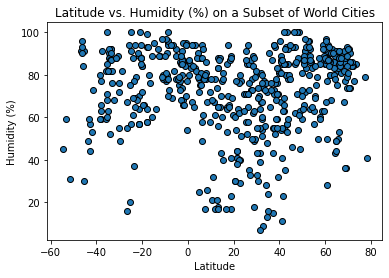

In [15]:
plt.scatter(weather_df.Latitude, weather_df.Humidity, edgecolors="black")
plt.title("Latitude vs. Humidity (%) on a Subset of World Cities")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("./Images/lat_humid.png", bbox_inches="tight")
plt.show()
plt.close()

In [16]:
correlation_matrix = np.corrcoef(weather_df.Latitude, weather_df.Humidity)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared = round(r_squared,2)
print(f"The latitude vs. humidity plot has no correlation. It has a r_squared value of {r_squared}.")

The latitude vs. humidity plot has no correlation. It has a r_squared value of 0.0.


## Latitude vs. Cloudiness Plot

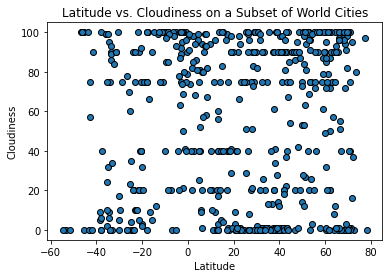

In [17]:
plt.scatter(weather_df.Latitude, weather_df.Cloudiness, edgecolors="black")
plt.title("Latitude vs. Cloudiness on a Subset of World Cities")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("./Images/lat_cloudiness.png", bbox_inches="tight")
plt.show()
plt.close()

In [18]:
correlation_matrix = np.corrcoef(weather_df.Latitude, weather_df.Cloudiness)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared = round(r_squared,2)
print(f"The latitude vs. cloudiness plot has no correlation. It has a r_squared value of {r_squared}.")

The latitude vs. cloudiness plot has no correlation. It has a r_squared value of 0.0.


## Latitude vs. Wind Speed Plot

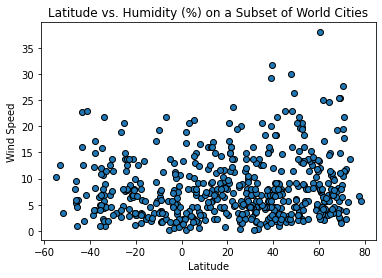

In [19]:
plt.scatter(weather_df.Latitude, weather_df.Windiness, edgecolors="black")
plt.title("Latitude vs. Humidity (%) on a Subset of World Cities")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("./Images/lat_winds.png",bbox_inches="tight")
plt.show()
plt.close()

In [20]:
print(f"The cluster of data points are scattered towards the bottom of the scatter plot. Windiness seems to be constant throughout the latitudes")

The cluster of data points are scattered towards the bottom of the scatter plot. Windiness seems to be constant throughout the latitudes


## Linear Regression

In [21]:
northern_hemis = weather_df.loc[weather_df.Latitude > 0]
southern_hemis = weather_df.loc[weather_df.Latitude < 0]

In [33]:
def to_linear_regress(x, y):
    pearson_r = round(st.pearsonr(x, y)[0],2)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept, 2)}"
    plt.scatter(x, y, edgecolors="black")
    plt.plot(x,regress_values,"r-")
    print(f"correlation coefficient : {pearson_r}")
    return line_eq

In [35]:
# to show line equation on graph
def to_annotate(line_eq, x, y):
    plt.annotate(line_eq,(x,y),fontsize=13,color="magenta")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

correlation coefficient : -0.87


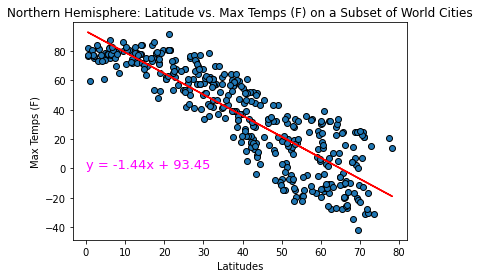

In [37]:
northern_max_line = to_linear_regress(northern_hemis.Latitude, northern_hemis.Temperatures)
plt.title("Northern Hemisphere: Latitude vs. Max Temps (F) on a Subset of World Cities")
plt.xlabel("Latitudes")
plt.ylabel("Max Temps (F)")

to_annotate(northern_max_line,0, 0)

plt.savefig("./Images/lats_northern_temps.png",bbox_inches="tight")
plt.show()
plt.close()

In [55]:
print("Since the correlation coefficient for this graph is -0.87, this means that the Lat vs. Max plot has a strong negative correlation.")

Since the correlation coefficient for this graph is -0.87, this means that the Lat vs. Max plot has a strong negative correlation.


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

correlation coefficient : 0.61


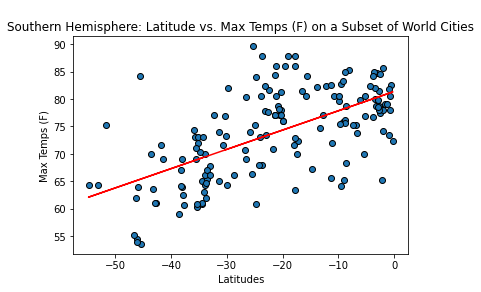

In [39]:
southern_max_line = to_linear_regress(southern_hemis.Latitude, southern_hemis.Temperatures)
plt.title("Southern Hemisphere: Latitude vs. Max Temps (F) on a Subset of World Cities")
plt.xlabel("Latitudes")
plt.ylabel("Max Temps (F)")

to_annotate(southern_max_line, -25, 95)

plt.savefig("./Images/lats_southern_temps.png",bbox_inches="tight")
plt.show()
plt.close()

In [57]:
print("The Southern Hemisphere: Lat. vs Max Temps plot has a moderate positive correlation based on its correlation coefficient of 0.61")

The Southern Hemisphere: Lat. vs Max Temps plot has a moderate positive correlation based on its correlation coefficient of 0.61


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

correlation coefficient : 0.27


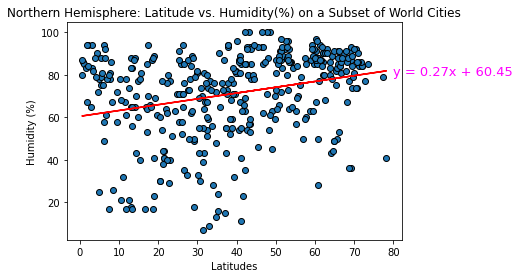

In [41]:
northern_humid_line = to_linear_regress(northern_hemis.Latitude, northern_hemis.Humidity)
plt.title("Northern Hemisphere: Latitude vs. Humidity(%) on a Subset of World Cities")
plt.xlabel("Latitudes")
plt.ylabel("Humidity (%)")

to_annotate(northern_humid_line, 80, 80)

plt.savefig("./Images/lats_northern_humidity.png", bbox_inches="tight")
plt.show()
plt.close()

In [58]:
print("The Northern Hemisphere: Lat vs. Humidity plt has a very weak positive correlation as its correlation coefficient is 0.27")

The Northern Hemisphere: Lat vs. Humidity plt has a very weak positive correlation as its correlation coefficient is 0.27


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

correlation coefficient : 0.28


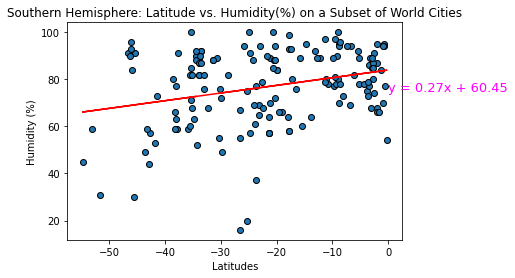

In [43]:
southern_humid_line = to_linear_regress(southern_hemis.Latitude, southern_hemis.Humidity)
plt.title("Southern Hemisphere: Latitude vs. Humidity(%) on a Subset of World Cities")
plt.xlabel("Latitudes")
plt.ylabel("Humidity (%)")

to_annotate(northern_humid_line, 0, 75)

plt.savefig("./Images/lats_southern_humidity.png",bbox_inches="tight")
plt.show()
plt.close()

In [60]:
print("The Southern Hemisphere: Lat vs. Humidity plot has a very weak positive correlation as its correlation coefficient is 0.28")

The Southern Hemisphere: Lat vs. Humidity plot has a very weak positive correlation as its correlation coefficient is 0.28


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

correlation coefficient : 0.1


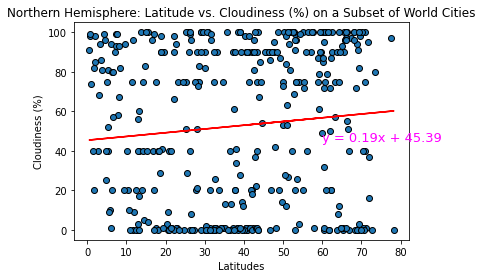

In [61]:
northern_cloudy_line = to_linear_regress(northern_hemis.Latitude, northern_hemis.Cloudiness)
plt.title("Northern Hemisphere: Latitude vs. Cloudiness (%) on a Subset of World Cities")
plt.xlabel("Latitudes")
plt.ylabel("Cloudiness (%)")

to_annotate(northern_cloudy_line, 60, 45)

plt.savefig("./Images/lats_northern_cloudiness.png",bbox_inches="tight")
plt.show()
plt.close()

In [62]:
print("The Northern Hemisphere: Lat vs. Cloudiness plot has a very weak positive correlation as its correlation coefficient is 0.1")

The Northern Hemisphere: Lat vs. Cloudiness plot has a very weak positive correlation as its correlation coefficient is 0.1


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

correlation coefficient : 0.3


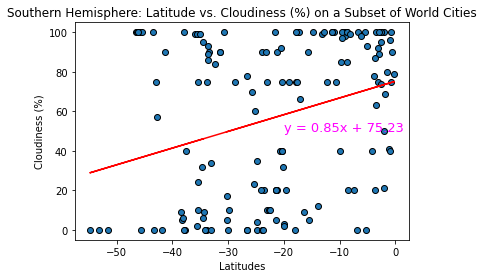

In [47]:
southern_cloudy_line = to_linear_regress(southern_hemis.Latitude, southern_hemis.Cloudiness)
plt.title("Southern Hemisphere: Latitude vs. Cloudiness (%) on a Subset of World Cities")
plt.xlabel("Latitudes")
plt.ylabel("Cloudiness (%)")

to_annotate(southern_cloudy_line, -20, 50)

plt.savefig("./Images/lats_southern_cloudiness.png",bbox_inches="tight")
plt.show()
plt.close()

In [63]:
print("The Southern Hemisphere: Lat vs. Cloudiness plot has a weak positive correlation as its correlation coefficient is 0.3")

The Southern Hemisphere: Lat vs. Cloudiness plot has a weak positive correlation as its correlation coefficient is 0.3


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

correlation coefficient : 0.09


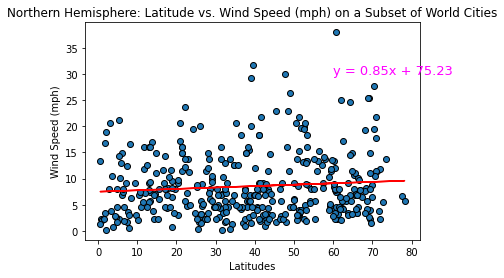

In [66]:
northern_windy_line = to_linear_regress(northern_hemis.Latitude, northern_hemis.Windiness)
plt.title("Northern Hemisphere: Latitude vs. Wind Speed (mph) on a Subset of World Cities")
plt.xlabel("Latitudes")
plt.ylabel("Wind Speed (mph)")

to_annotate(southern_cloudy_line, 60, 30)

plt.savefig("./Images/lats_northern_speeds.png",bbox_inches="tight")
plt.show()
plt.close()

In [67]:
print("The Northern Hemisphere: Lat vs. Wind Speed plot has a very weak positive correlation as its correlation coefficient is 0.09")

The Northern Hemisphere: Lat vs. Wind Speed plot has a very weak positive correlation as its correlation coefficient is 0.09


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

correlation coefficient : -0.23


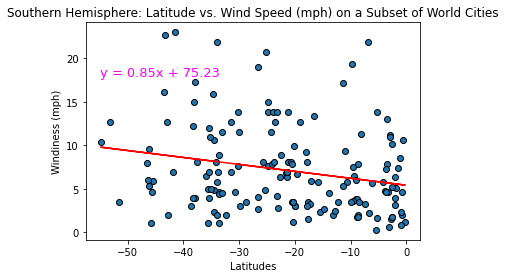

In [68]:
southern_windy_line = to_linear_regress(southern_hemis.Latitude, southern_hemis.Windiness)
plt.title("Southern Hemisphere: Latitude vs. Wind Speed (mph) on a Subset of World Cities")
plt.xlabel("Latitudes")
plt.ylabel("Windiness (mph)")

to_annotate(southern_cloudy_line, -55,18)

plt.savefig("./Images/lats_southern_speeds.png",bbox_inches="tight")
plt.show()
plt.close()

In [69]:
print("The Southern Hemisphere: Lat vs. Wind Speed plot has a very weak negative correlation as its correlation coefficient is 0.09")

The Southern Hemisphere: Lat vs. Wind Speed plot has a very weak negative correlation as its correlation coefficient is 0.09
